# **Tp Machine Learning**





## **Présentation du Jeu de données Iris**

Le jeu de données Iris a été initialement publié à l’ UCI Machine Learning Repository: Iris Data Set. Ce Data Set de 1936 est souvent utilisé pour tester des algorithmes d’apprentissage automatique et des visualisations.

Le jeu de données Iris contient trois variantes de la fleur Iris. Il contient 150 observations (ligne du jeu de donnée) réparties de manière égale entre les trois espèces de fleurs d'iris (setosa, virginica et versicolor). Quatre caractéristiques sont mesurées pour chaque observation (c.-à-d. la longueur et la largeur du sépale et du pétale, en centimètres).
Le jeu de données est étiquetée par le type de fleur. Ainsi pour quatre attributs décrivant une fleur d’Iris, on saura de quelle variante il s’agit.

Dans ce TP on va travailler sur le dataset Iris afin d'atteindre deux objectifs :


---


1/ Clustering du dataset Iris.  
2/ Classification des fleurs d'Iris.



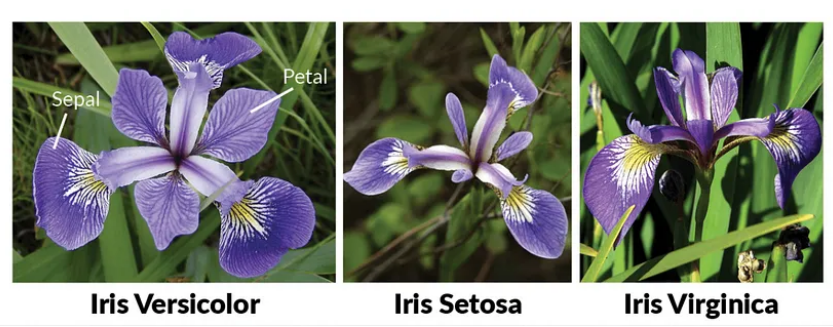

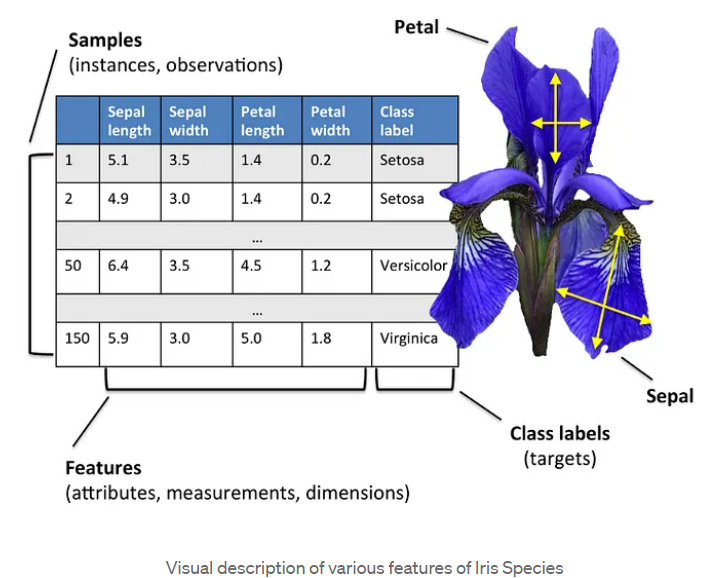

## Importation des bibliothéques nécessaires

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Data visualization libraires
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
# show plot in the notebook
%matplotlib inline

In [2]:
#Importing algorithms
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier

# **Prétraitement et exploration des données**

In [3]:
#Loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" #Make sure to have an Internet connection while loading the data
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)

In [13]:
#Afficher le nombre de lignes et de colonnes dans le dataset
data.shape

(150, 5)

In [8]:
#Afficher les 10 premieres lignes du dataset
data.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
#Afficher les 10 derniéres lignes du dataset
data.tail(10)

,sepal-length,sepal-width,petal-length,petal-width,class
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
#Afficher un résumé statistique du dataset ( mean, std, count...)
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Vérfication des doublons

In [15]:
#Vérifier les doublons dans le dataset
data[data.duplicated()]

,sepal-length,sepal-width,petal-length,petal-width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


### Vérification du nombre d'observation par classe

In [26]:
#Afficher le nombre d'observation par classe
data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [27]:
data.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

### Visualization des données

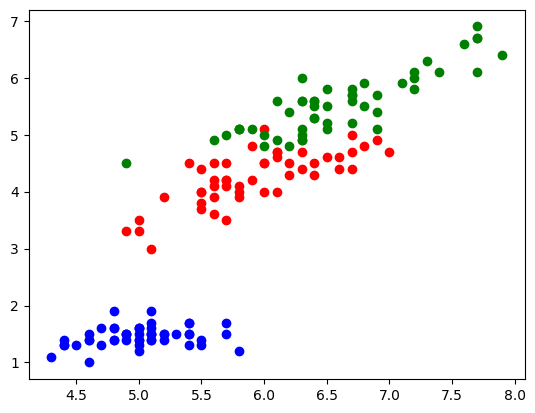

In [40]:
#Visualizer les caractéristiques des différentes catégories des fleurs d'iris (sepal-length,	sepal-width,	petal-length,	petal-width)
#afficher au minimum trois graphiques ( boites à moustaches, nuage de points ...)

#Graph 1
legend, plot = plt.subplots()
plt.scatter(data[data['class']== 'Iris-setosa']['sepal-length'], data[data['class']== 'Iris-setosa']['petal-length'],color='blue', marker='o', label='Setosa')
plt.scatter(data[data['class']== 'Iris-versicolor']['sepal-length'], data[data['class']== 'Iris-versicolor']['petal-length'],color='red', marker='o', label='versicolor')
plt.scatter(data[data['class']== 'Iris-virginica']['sepal-length'], data[data['class']== 'Iris-virginica']['petal-length'],color='green', marker='o', label='virginica')

#this scatter plot illustrates the sepal petal length values for each iris class

<Axes: xlabel='class', ylabel='sepal-length'>

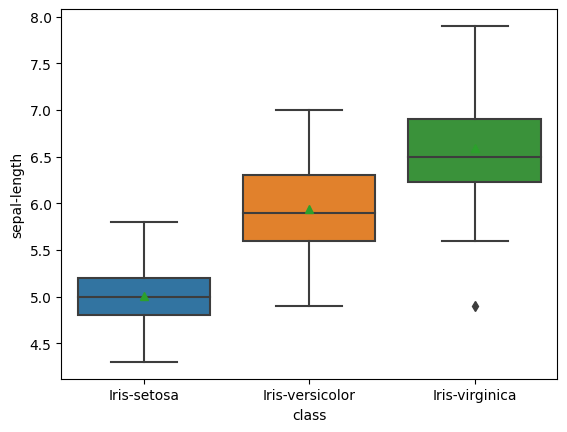

In [69]:
#Graph 2
sns.boxplot(x=data["class"], y=data['sepal-length'], showmeans=True)

this boxplot presents the variablity of values for  sepal-length and shows the mean(presented by the green arrow) the mode (with the black line inside the boxplot).

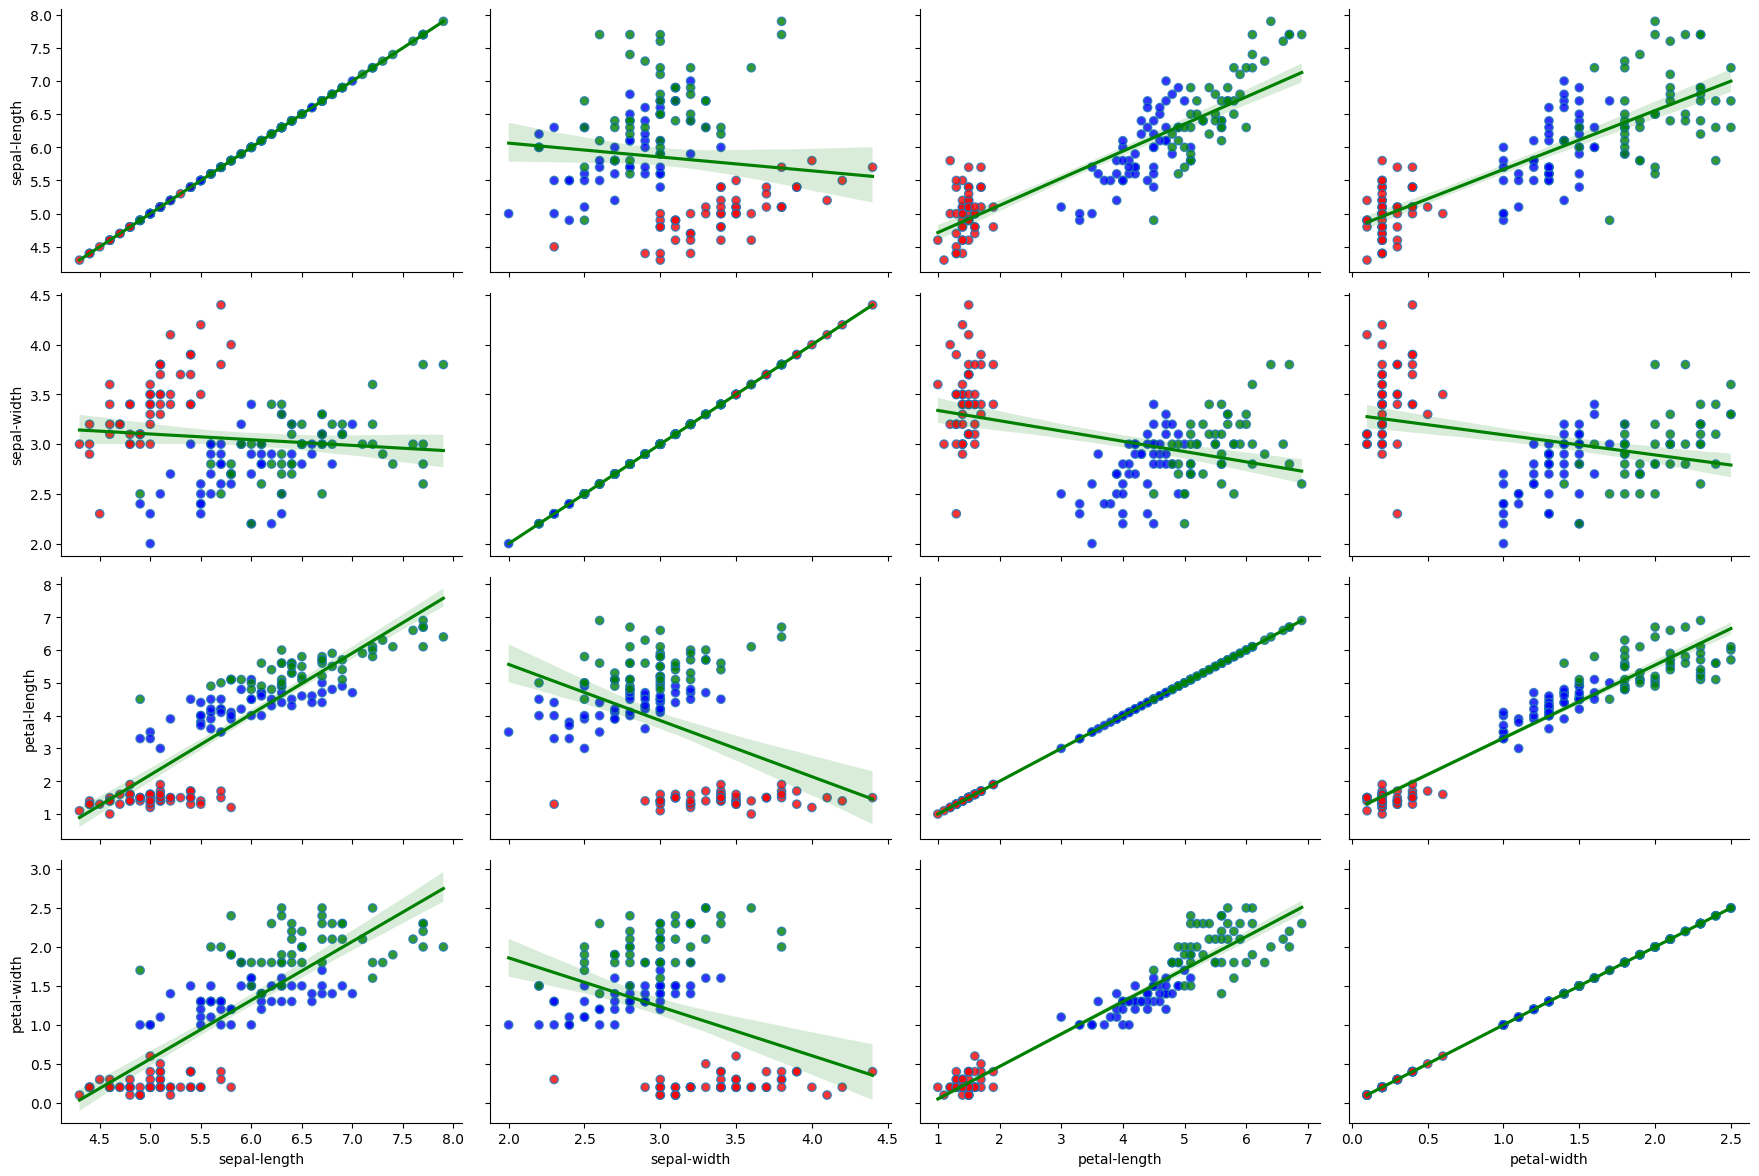

In [45]:
#Graph 3

colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}
scatter_col = [colors[i] for i in data['class']]
g = sns.PairGrid(data,height=3, aspect=1.5)
g = g.map(sns.regplot,line_kws={"color": "green"},scatter_kws={'facecolors':scatter_col})

In [47]:
#afficher la corrélation entre les caractéristiques des fleurs d'iris
data.corr()

<ipython-input-47-9a392af337b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


## **1/ Clustering**

In [48]:
# Séparer les variables et la classe cible
array = data.values
X = array[:, 0:4] # les varaiables
Y = array[:, 4] #la classe cible

### L'algorithme K-means

Utiliser la méthode du coude pour déterminer le nombre optimal de clusters pour l'algorithme k-means

In [70]:
#code
from sklearn.cluster import KMeans

In [74]:
#apprentissage avec l'algorithme k-means
wcss = []
df = data.iloc[:, [0, 1, 2, 3]].values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

## Visualization des clusters de K-means

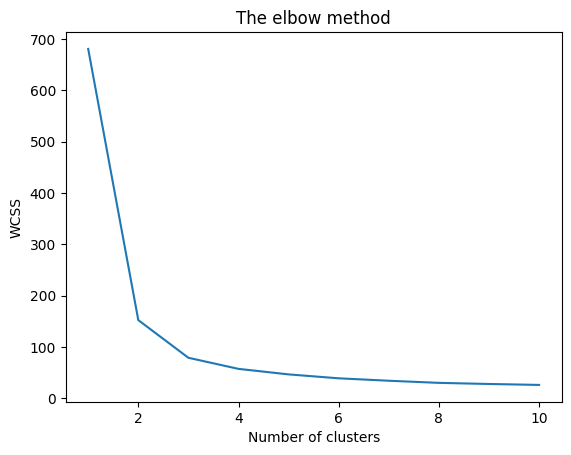

In [75]:
#Visualiser les clusters
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

we visualise using the elbow methods that the optimal number of clusters is 3

## Visualization des classes réelles

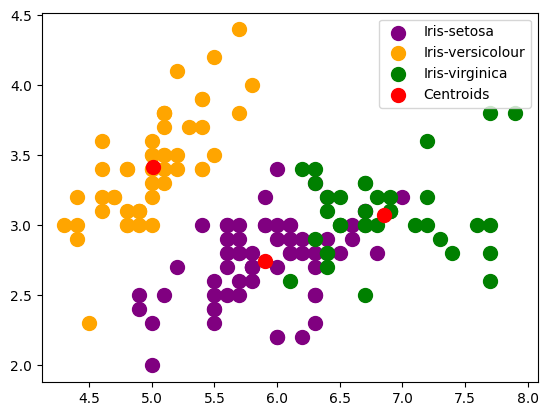

In [76]:
#Comparer le graphique des groupes de l'algorithme K-means avec le graphiques des classes réelles définies dans le dataset.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df)

plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

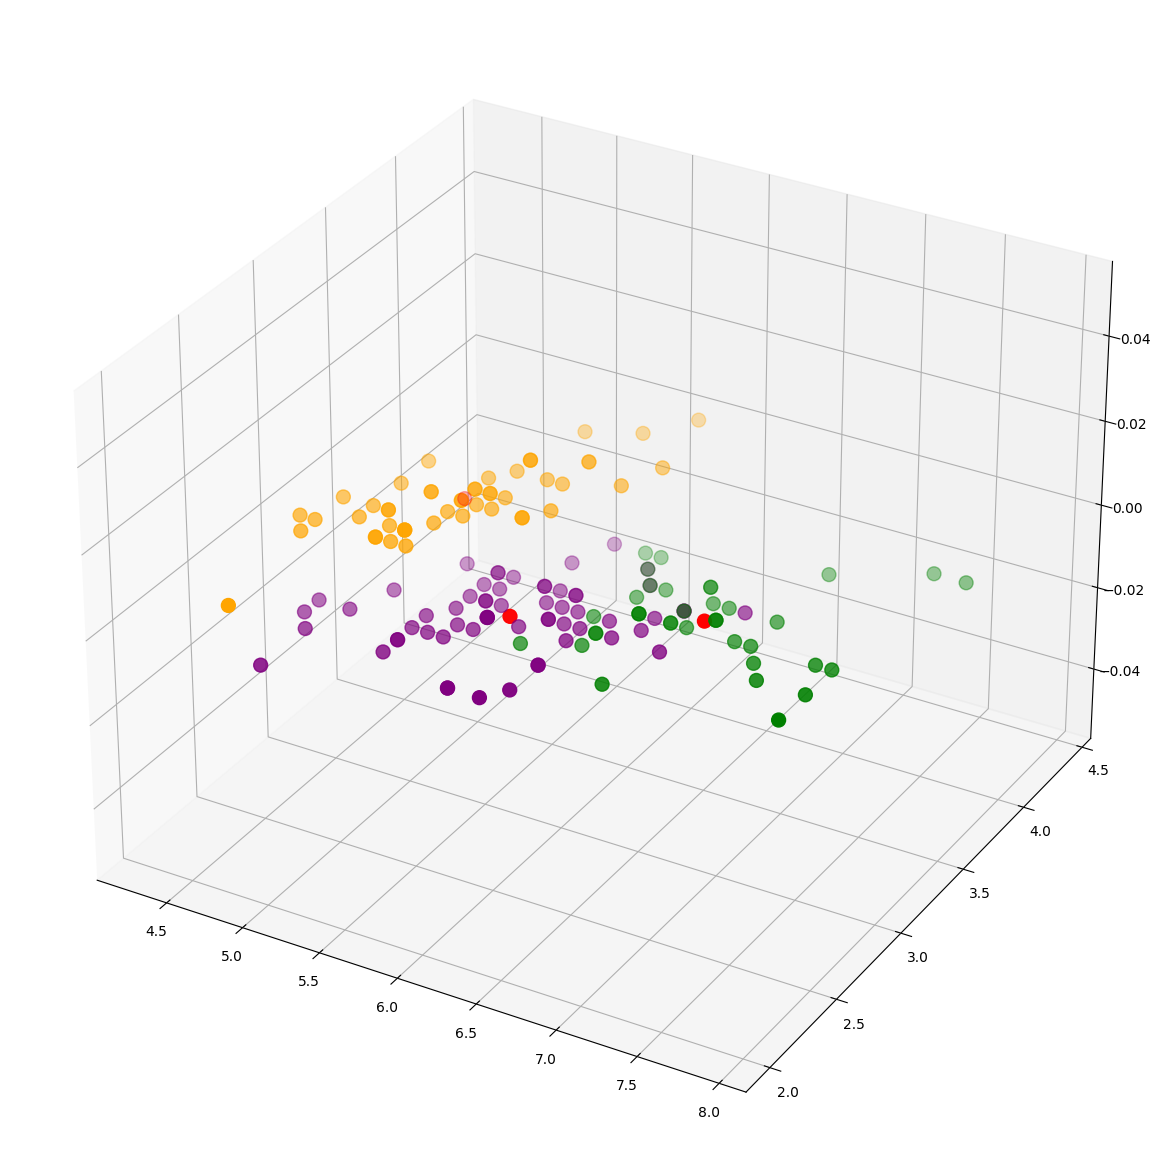

In [78]:

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

Heres we can visualise the values scatter plot a 3d visualisation. It helps understand the dispersion of values more clearly

### **2/ Classification**

## Régression logistique

In [96]:
from sklearn.linear_model import LogisticRegression # import de la classe
from sklearn.model_selection import train_test_split
target=data['class']
# after spereating the class values in a target dataframe, we need to split the values in order to guarantee that the testing data remains unknown for the model and we use it to evaluate it
X_train, X_test, y_train, y_test= train_test_split(df, target, train_size=0.8, random_state=5)
clf1 = LogisticRegression(C=1e20) # construction d'un objet de Régression logistique
clf1.fit(X_train, y_train)
print('Le train score est :', clf1.score(X_train, y_train))
print('Le test score est :', clf1.score(X_test, y_test))

Le train score est : 1.0
Le test score est : 0.9333333333333333


### a/ Evaluation par Cross validation

In [97]:
from sklearn.model_selection import cross_val_score
val_score=cross_val_score(KNeighborsClassifier(n_neighbors=2), X_train, y_train, cv=5)
val_score.mean()

0.9666666666666668

### b/ Evaluation par Train-Test Split

In [98]:
#I used it in the cell forthe logistic regression

### c/ Evaluation par kfold validation

In [99]:
scores = cross_val_score(model, df, target, cv=5)
scores

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [100]:
# Appliquer au minimum trois algorithmes de classification

## Méthode des k plus proches voisins

In [101]:
X_train, X_test, y_train, y_test= train_test_split(df, target, train_size=0.8, random_state=5)
clf2 = KNeighborsClassifier() # construction d'un objet de  knn
clf2.fit(X_train, y_train)
print('Le train score est :', clf2.score(X_train, y_train))
print('Le test score est :', clf2.score(X_test, y_test))

Le train score est : 0.9833333333333333
Le test score est : 0.9333333333333333


## Forêt d’arbre de décision

In [102]:
X_train, X_test, y_train, y_test= train_test_split(df, target, train_size=0.8, random_state=5)
clf3 = RandomForestClassifier() # construction d'un objet de random forest classifier
clf3.fit(X_train, y_train)
print('Le train score est :', clf3.score(X_train, y_train))
print('Le test score est :', clf3.score(X_test, y_test))

Le train score est : 1.0
Le test score est : 0.9


## Arbre de décision

In [103]:
X_train, X_test, y_train, y_test= train_test_split(df, target, train_size=0.8, random_state=5)
clf4 = DecisionTreeClassifier() # construction d'un objet de decision tree classifier
clf4.fit(X_train, y_train)
print('Le train score est :', clf4.score(X_train, y_train))
print('Le test score est :', clf4.score(X_test, y_test))

Le train score est : 1.0
Le test score est : 0.8666666666666667


## Machine à vecteurs de support

In [104]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test= train_test_split(df, target, train_size=0.8, random_state=5)
clf5 = SVC() # construction d'un objet de svm
clf5.fit(X_train, y_train)
print('Le train score est :', clf5.score(X_train, y_train))
print('Le test score est :', clf5.score(X_test, y_test))

Le train score est : 0.975
Le test score est : 0.9666666666666667


## Apprentissage de vote de majorité pour la classification

In [106]:
from sklearn.ensemble import VotingClassifier
eclf3 = VotingClassifier(estimators=[  ('logisticreg', clf1), ('KNN', clf2), ('DecisionTree', clf3)], voting='hard', weights=[2,1,1],
      flatten_transform=True)
eclf3 = eclf3.fit(df, target)
print(eclf3.predict(df))

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

### Evaluation du modéle finale

In [108]:
# pour moi le meilleur model est le SVM car il a un score de train et test tres proche et des scores elleves  du coup c'est le meilleutr pour moi
Y_predicted=clf5.predict(X_test)
acc= accuracy_score( Y_predicted, y_test)
print( "Accuracy score is ",acc)

Accuracy score is  0.9666666666666667


### Prédiction

In [110]:
#Réaliser la classification de ce nouvel exemple en utilisant votre meilleur algorithme de classification sur le dataset Iris.

#Input  :4.7, 3.2, 1.3, 0.2
#Output :Iris Setosa

fleur_a=[[4.7, 3.2, 1.3, 0.2]]

In [111]:
class_fleur_a=clf5.predict(fleur_a)
print(class_fleur_a)

['Iris-setosa']
